In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

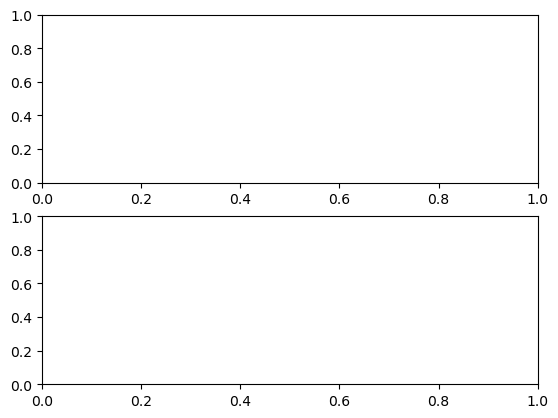

In [6]:
plt.subplots(2,1)               # row, column

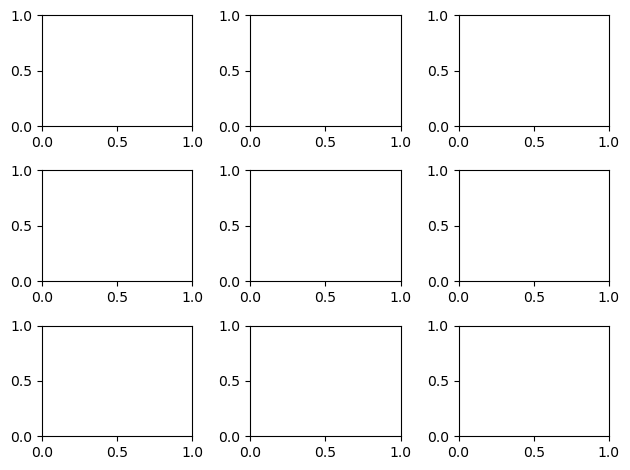

In [9]:
plt.subplots(3,3)               # row, column
plt.tight_layout()              # adjusting the overlapping

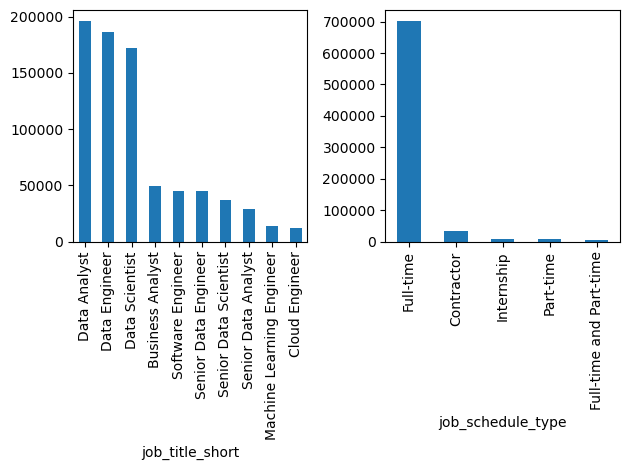

In [21]:
fig, ax = plt.subplots(1, 2)
df["job_title_short"].value_counts().plot(kind = "bar", ax = ax[0])
df["job_schedule_type"].value_counts().head().plot(kind = "bar", ax = ax[1])
fig.tight_layout()

### Example - Counts of Top Skills in Job Postings

demo

In [31]:
df_skills = df.copy()
a = df_skills.explode("job_skills")


In [33]:
b = a.groupby(["job_skills", "job_title_short"]).size()
b

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [37]:
c = b.reset_index(name = "skill_count")
c

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [38]:
c.sort_values(by = "skill_count", ascending = False)

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


Apply

In [39]:
df_skills = df.copy()

df_skills = df_skills.explode("job_skills")

skill_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

df_skill_count = skill_count.reset_index(name = "skill_count")

df_skill_count.sort_values(by = "skill_count", ascending = False, inplace = True)

df_skill_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


demo 

In [57]:
job_title = ["Data Scientist", "Data Engineer", "Data Analyst"]

In [60]:
for i, j in enumerate(job_title):               # enumerate gives you both the index and the value when looping.
    print(i, j)

0 Data Scientist
1 Data Engineer
2 Data Analyst


In [64]:
df_skill_count[df_skill_count["job_title_short"] == "Data Analyst"].head()

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380


Apply

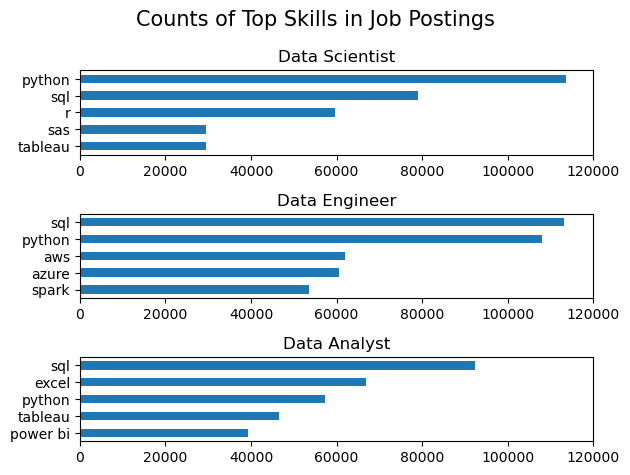

In [98]:
fig, ax = plt.subplots(3, 1)

job_title = ["Data Scientist", "Data Engineer", "Data Analyst"]

for i, j in enumerate(job_title):
    graph = df_skill_count[df_skill_count["job_title_short"] == j].head()
    graph.plot(kind = "barh", x = "job_skills", y = "skill_count", ax = ax[i], title = j)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
fig.suptitle("Counts of Top Skills in Job Postings", fontsize = 15)
fig.tight_layout()